##  PCA or T-SNE 
### Data dummies


In [230]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.patheffects as PathEffects


df_embeddings = pd.read_csv("/Users/fabianmahner/Downloads/embeddings_CBOW_all_2000.csv")


In [231]:
df_embeddings = df_embeddings.iloc[:,1:]

In [232]:
df_embeddings

,word,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,I,7.590919e-02,1.522252e-01,-7.296901e-02,-1.362623e-01,-1.512983e-01,-1.010329e-02,-2.651106e-02,-1.074874e-02,1.853046e-01,...,2.424871e-01,1.173413e-01,-7.170857e-02,-6.830373e-03,-8.763733e-03,2.955823e-03,2.396638e-01,4.053225e-03,-4.437260e-02,4.719551e-02
1,think,1.241171e-01,1.026601e-01,5.331656e-02,3.831034e-03,9.422549e-02,3.651541e-03,-3.357525e-03,-7.834332e-02,-2.757770e-01,...,-6.120160e-02,-2.091624e-01,-1.235119e-02,-9.014888e-02,9.537274e-02,-4.158557e-02,-1.386249e-01,-2.776899e-02,-1.338986e-01,5.025086e-02
2,you,5.503432e-02,2.114778e-01,4.648545e-02,-5.064499e-02,-2.270128e-01,-1.211586e-01,9.774652e-02,-1.673867e-02,1.585350e-01,...,1.310978e-01,1.520512e-01,-1.561932e-01,-5.139655e-03,8.808245e-02,-7.615295e-02,1.693522e-01,4.919219e-02,-3.547660e-02,1.864796e-02
3,go,1.652523e-02,9.940312e-02,2.052166e-02,-6.609263e-04,1.133120e-01,-8.719999e-02,5.663981e-03,-5.428351e-03,-4.845776e-02,...,-1.771291e-02,1.740042e-02,2.345619e-02,-6.385182e-02,1.728640e-02,-3.054161e-03,-1.042966e-02,-1.305990e-02,9.511017e-02,1.587488e-02
4,to,5.102863e-02,-7.061285e-01,-1.746409e-01,2.003406e-01,1.510255e-01,-4.693574e-02,2.438295e-01,6.347522e-02,7.148095e-02,...,6.506417e-02,1.946409e-01,-2.362106e-02,2.259979e-01,-2.074874e-01,-1.551597e-01,-2.753973e-01,-1.057928e-01,-1.934465e-01,-4.858161e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,revocation,1.357543e-05,-3.503262e-05,-8.231326e-04,3.301988e-04,-1.709957e-05,-3.190082e-04,1.341250e-04,1.379751e-03,1.019639e-03,...,-1.888998e-04,4.784938e-05,-3.376593e-04,-1.112021e-03,3.601007e-04,1.056930e-03,4.794874e-04,-5.575763e-04,-1.643760e-03,-1.374028e-03
7064,beata,-3.485900e-41,-3.497200e-41,3.484300e-41,3.466500e-41,3.458100e-41,3.451500e-41,-3.672400e-41,-3.467400e-41,-3.447500e-41,...,3.487000e-41,3.486300e-41,-3.562000e-41,3.512800e-41,-3.478900e-41,-3.465000e-41,-3.515300e-41,-3.790500e-41,-3.475200e-41,-3.473400e-41
7065,zhuangzi,-3.645422e-04,3.409918e-04,1.837284e-04,-6.139247e-05,-2.694621e-04,-1.516766e-04,3.335328e-04,2.263339e-03,2.498788e-03,...,3.619293e-04,7.463282e-04,9.848135e-05,1.320080e-04,7.271229e-05,-4.310948e-04,2.902481e-04,-7.029413e-05,-2.478789e-03,-3.212857e-04
7066,thesimpson,2.753051e-04,5.978251e-05,1.074415e-04,-1.260770e-05,-8.268288e-04,2.256150e-04,7.156780e-05,5.600244e-04,1.467248e-04,...,-4.268442e-04,-6.339191e-04,-3.378659e-04,-4.553061e-04,8.185502e-04,-2.357629e-04,8.658281e-05,-3.546356e-04,-1.404155e-03,2.296448e-04


## First PCA

In [233]:
# Drop the non-numerical 'word' column
X = df_embeddings.drop(columns=['word'])

X_standardized = StandardScaler().fit_transform(X)

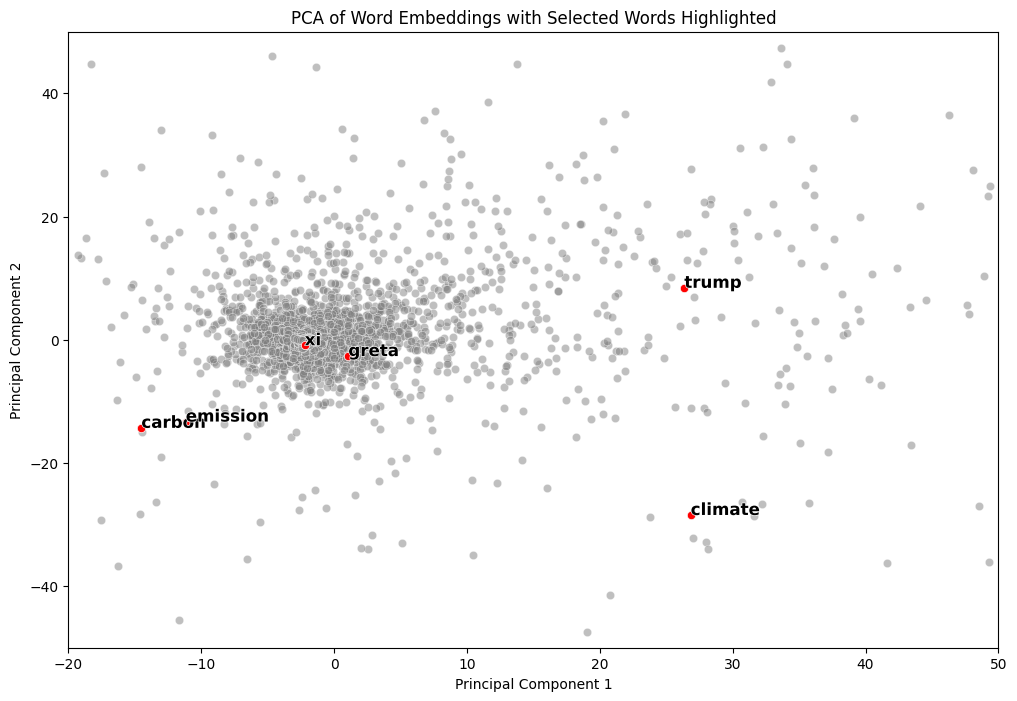

In [240]:
# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the 'word' column back for labeling
pca_df['word'] = df_embeddings['word']

# Specify the words you want to highlight
highlight_words = ["climate",  "trump", "greta", "xi", "emission", "carbon"]

# Filter the DataFrame to include only the selected words
highlight_df = pca_df[pca_df['word'].isin(highlight_words)]

# Plotting the PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, color='gray', alpha=0.5)

# Highlight the selected words in a different color
sns.scatterplot(x='PC1', y='PC2', data=highlight_df, color='red')

# Annotate the points with the selected word labels with improved styling
for i in range(highlight_df.shape[0]):
    txt = plt.text(x=highlight_df.PC1.iloc[i], y=highlight_df.PC2.iloc[i], s=highlight_df.word.iloc[i], 
                   fontdict=dict(color='black', size=12, weight='bold'))
    
    # Add a white outline to the text for better visibility
    txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='white')])
plt.xlim(-20, 50)  # Example limits for PC1
plt.ylim(-50, 50)  # Example limits for PC2
plt.title('PCA of Word Embeddings with Selected Words Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Code

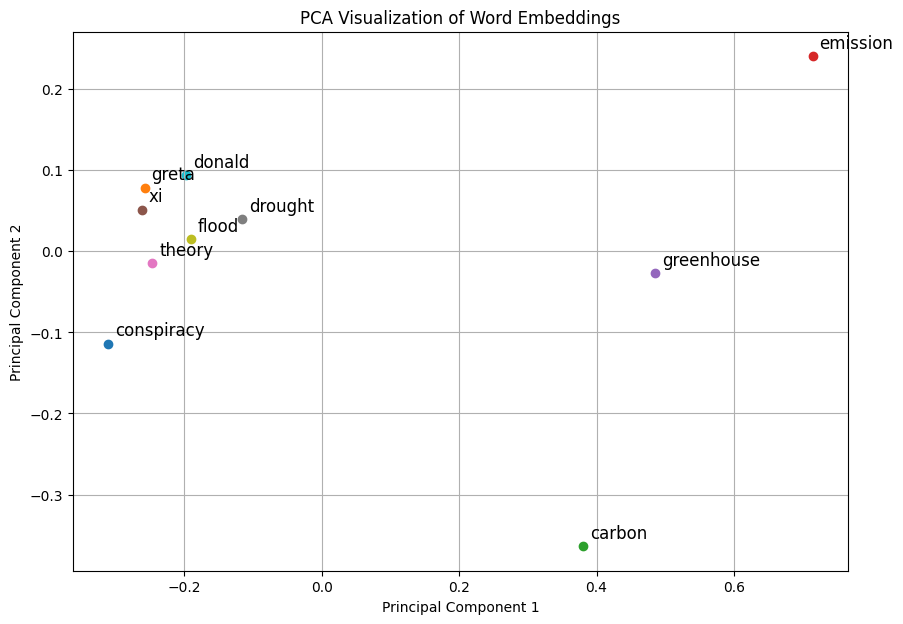

In [215]:
# List of words you want to visualize
words_to_visualize = ["carbon", "emission", "greenhouse", "flood", "drought", "theory", 
                       "xi", "greta",  "conspiracy", "donald"]

# Filter the dataframe for those words
df_filtered = df_embeddings[df_embeddings['word'].isin(words_to_visualize)]

# Extract the features for PCA
X = df_filtered.drop(columns=['word'])

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['word'] = df_filtered['word'].values

# Plot the results
plt.figure(figsize=(10, 7))
for i, word in enumerate(pca_df['word']):
    plt.scatter(pca_df['PC1'].iloc[i], pca_df['PC2'].iloc[i], label=word)
    plt.text(pca_df['PC1'].iloc[i] + 0.01, pca_df['PC2'].iloc[i] + 0.01, word, fontsize=12)

plt.title('PCA Visualization of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.legend()
plt.grid(True)
plt.show()

## Cosine similarity

In [216]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to find the most similar words to a given word
def find_similar_words(word, word_embeddings, top_n=10):
    word_vector = word_embeddings.loc[word].values.reshape(1, -1)
    similarities = cosine_similarity(word_vector, word_embeddings)
    similarities = similarities.flatten()
    most_similar_indices = np.argsort(similarities)[::-1][1:top_n+1]
    similar_words = word_embeddings.index[most_similar_indices]
    return similar_words, similarities[most_similar_indices]

# Filter word embeddings to include only the relevant words
climate_terms = ["donald", "xi"]

similar_words_dict = {}
for term in climate_terms:
    similar_words, similarities = find_similar_words(term, df_embeddings.set_index('word'), top_n=3)
    similar_words_dict[term] = list(zip(similar_words, similarities))

# Display similar words for each climate term
for term, similar_words in similar_words_dict.items():
    print(f"Words similar to '{term}':")
    for word, similarity in similar_words:
        print(f"{word}: {similarity:.4f}")
    print("\n")


Words similar to 'donald':
joe: 0.8272
falsely: 0.8135
etc: 0.8128


Words similar to 'xi':
independence: 0.8021
amp: 0.7950
estate: 0.7919




In [217]:
def cosine_similarity_between_words(word1, word2, word_embeddings):
    # Get the embeddings for the two words
    try:
        vector1 = word_embeddings.loc[word1].values.reshape(1, -1)
        vector2 = word_embeddings.loc[word2].values.reshape(1, -1)
    except KeyError as e:
        print(f"Error: {e}")
        return None
    
    # Check if the vectors are identical (which would yield a similarity of 1.0)
    if np.array_equal(vector1, vector2):
        print(f"Warning: The vectors for '{word1}' and '{word2}' are identical.")
    
    # Compute the cosine similarity
    similarity = cosine_similarity(vector1, vector2)
    
    return similarity[0][0]

# Example usage:
word1 = "donald"
word2 = "xi"

# Assuming df_embeddings is a DataFrame with words as the index and embeddings as the columns
similarity = cosine_similarity_between_words(word1, word2, df_embeddings.set_index('word'))

print(f"Cosine similarity between '{word1}' and '{word2}': {similarity}")



Cosine similarity between 'donald' and 'xi': 0.744665802919237


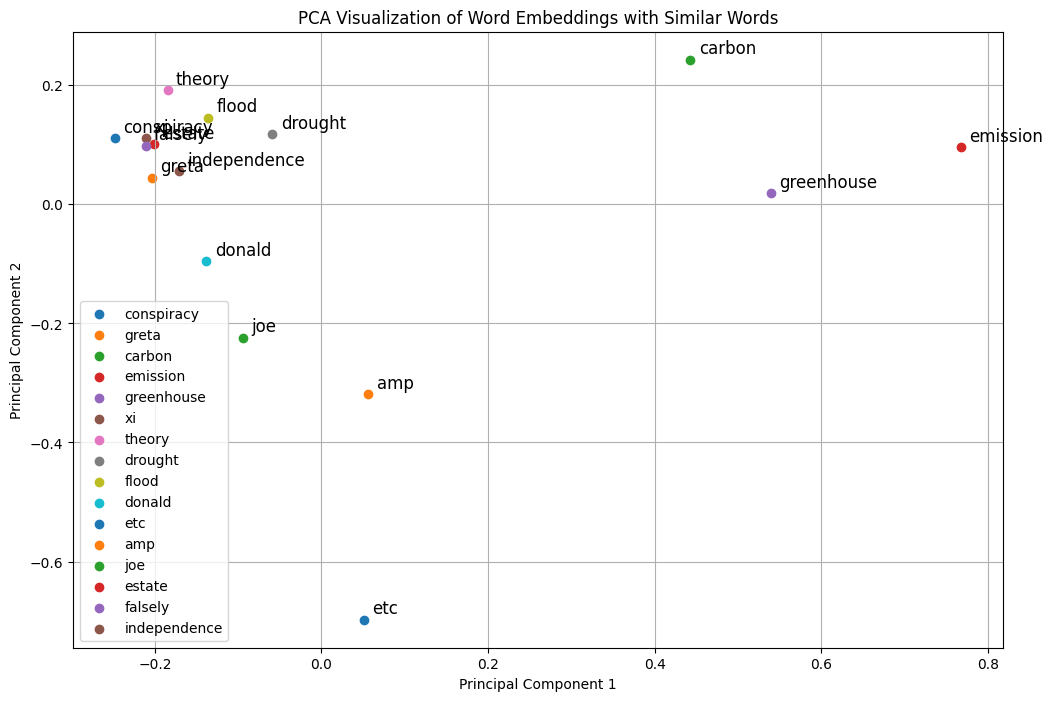

In [218]:
# Assuming you want to visualize the similar words in the same PCA space
similar_words_to_add = [word for sublist in similar_words_dict.values() for word, _ in sublist]
df_similar_filtered = df_embeddings[df_embeddings['word'].isin(similar_words_to_add)]

# Combine with your original PCA data
df_combined = pd.concat([df_filtered, df_similar_filtered])

# Perform PCA on the combined dataset
X_combined = df_combined.drop(columns=['word'])
X_combined_pca = pca.fit_transform(X_combined)

# Create a new DataFrame for PCA results
pca_df_combined = pd.DataFrame(X_combined_pca, columns=['PC1', 'PC2'])
pca_df_combined['word'] = df_combined['word'].values

# Plot the results
plt.figure(figsize=(12, 8))
for i, word in enumerate(pca_df_combined['word']):
    plt.scatter(pca_df_combined['PC1'].iloc[i], pca_df_combined['PC2'].iloc[i], label=word)
    plt.text(pca_df_combined['PC1'].iloc[i] + 0.01, pca_df_combined['PC2'].iloc[i] + 0.01, word, fontsize=12)

plt.title('PCA Visualization of Word Embeddings with Similar Words')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [219]:
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px

# Assuming you have already filtered the DataFrame
# and extracted the features

# Apply PCA to reduce dimensions to 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['word'] = df_filtered['word'].values

# Plot the results in 3D
fig = px.scatter_3d(
    pca_df, 
    x='PC1', 
    y='PC2', 
    z='PC3', 
    text='word', 
    title='3D PCA Visualization of Word Embeddings'
)

# Improve layout and appearance
fig.update_traces(marker=dict(size=8), textposition='top center')
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()